In [1]:
dataset_path = '../datasets/Basketball/'
result_dataset_path = './intermediate_datafiles/Basketball/'

# Import the relevant classes.

from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os


if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

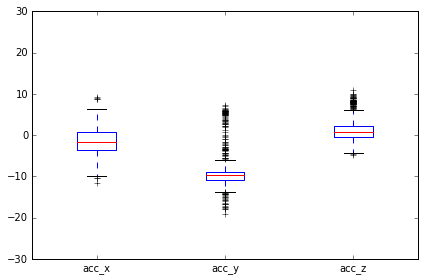

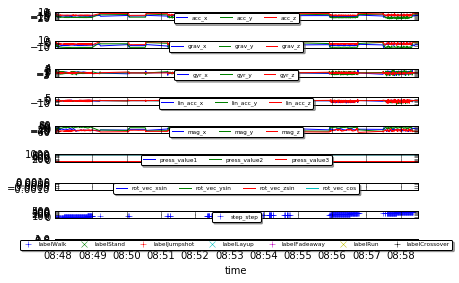

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.471698113208 -1.77120398798 3.17705175213 -11.5039056784 9.35472106731
acc_y 0.471698113208 -8.64307609283 4.74393875782 -19.2239996302 7.28141226346
acc_z 0.471698113208 1.4331274943 2.87302737337 -4.83367332721 10.9761559699
grav_x 0.47248427673 -0.990249460414 2.66908885202 -9.31149333981 8.98731281058
grav_y 0.47248427673 -7.56167112774 4.02844291802 -9.7890475 7.26125808269
grav_z 0.47248427673 2.03028298405 2.63564128561 -3.08880074808 9.48866230864
gyr_x 0.47248427673 0.0390934325101 0.750154724692 -2.89309544615 2.93409538467
gyr_y 0.47248427673 0.0206330355719 1.01905209946 -3.3038244975 3.44227895027
gyr_z 0.47248427673 -0.052843324185 0.493282130242 -2.14167682233 2.09294691233
lin_acc_x 0.391509433962 -0.912912747773 1.95046015396 -10.7605119123 4.04025683564
lin_acc_y 0.391509433962 -1.07322489737 2.10015794813 -11.7019166863 7.95387892904
lin_acc_z 0.391509433962 -0.702240690321 2.20507009354 -11.

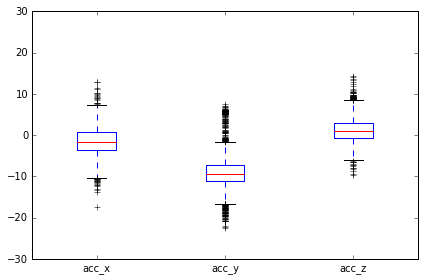

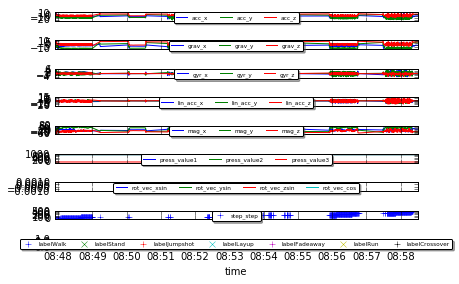

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.473270440252 -1.77178321939 3.73591123691 -17.4215988059 12.8701230154
acc_y 0.473270440252 -8.68022780963 5.48700542093 -22.619506936 7.49416584231
acc_z 0.473270440252 1.41312352166 3.57113185571 -9.68072680385 14.2719361808
grav_x 0.474056603774 -0.98552295425 2.7386197998 -9.46446451923 9.50739420192
grav_y 0.474056603774 -7.59769794673 4.0043223413 -9.79605932692 7.33605094808
grav_z 0.474056603774 2.01201901008 2.88267337211 -3.91021283462 9.62342376923
gyr_x 0.474056603774 0.0405735959886 1.22008058968 -4.23363318331 5.39519264487
gyr_y 0.474056603774 0.0184914994922 1.51000008083 -4.37617053462 4.90582951362
gyr_z 0.474056603774 -0.053067186701 0.751703900086 -3.92637844 2.34355043725
lin_acc_x 0.393474842767 -0.915947341826 2.86116571095 -14.2011482135 9.64538030577
lin_acc_y 0.393474842767 -1.07495647581 3.4939542292 -14.7336761563 11.066011899
lin_acc_z 0.393474842767 -0.704186579595 3.76219670988 -1

In [4]:
# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [500, 250]
datasets = []

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Accelerometer.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_')
   

    DataSet.add_numerical_dataset('Gravity.csv', 'timestamps', ['x','y','z'], 'avg', 'grav_')
    DataSet.add_numerical_dataset('Gyroscope.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_')
    DataSet.add_numerical_dataset('Linear_Acceleration.csv', 'timestamps', ['x','y','z'], 'avg', 'lin_acc_')
    DataSet.add_numerical_dataset('Magnetometer.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_')
  #  DataSet.add_numerical_dataset('Orientation.csv', 'timestamps', ['x','y','z'], 'avg', 'orie_')
    DataSet.add_numerical_dataset('Pressure.csv', 'timestamps', ['value1','value2','value3'], 'avg', 'press_')
    DataSet.add_numerical_dataset('Rotation vector.csv', 'timestamps', ['xsin','ysin','zsin','cos'], 'avg', 'rot_vec_')
    DataSet.add_numerical_dataset('Step_Counter.csv', 'timestamps', ['step'], 'avg', 'step_')
    
    
    DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

   
    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_x','acc_y','acc_z'])

    # Plot all data
   # DataViz.plot_dataset(dataset, ['acc_', 'grav_','gyr_','lin_acc_','mag_', 'orie_','press_','rot_vec_','step_', 'label'], ['like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])
    DataViz.plot_dataset(dataset, ['acc_', 'grav_','gyr_','lin_acc_','mag_','press_','rot_vec_','step_', 'label'], ['like', 'like','like','like', 'like','like','like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line','line', 'points', 'points'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')


In [ ]:
DataViz.plot_dataset(dataset, ['press_','rot_vec_'], ['like', 'like'], ['line', 'line's'])
